In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("loan_approval_data.csv")

In [6]:
# DATAFRAME ANALYSIS

df.head()
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


# Handle Missing Values

In [7]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["number"]).columns

In [11]:
categorical_cols.size + numerical_cols.size

20

In [13]:
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy="mean") #handle missing numerical values by storing mean
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])

In [23]:
#handle missing categorical values with most frequent values
cat_imp = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])

In [27]:
df
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

# EDA - exploratory data analysis

Text(0.5, 1.0, 'Loan Approval Status')

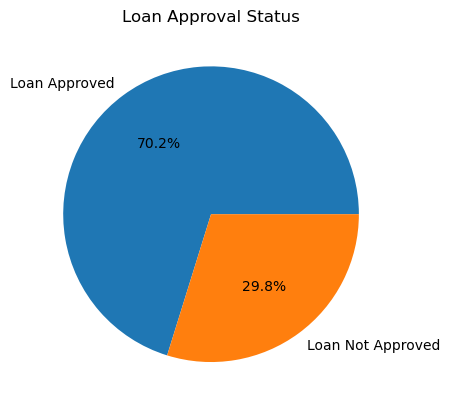

In [64]:
#check how balanced our data are by visualyzing

loan_approved_count = df["Loan_Approved"].value_counts()
plt.pie(loan_approved_count, labels=["Loan Approved","Loan Not Approved"], autopct="%1.1f%%")
plt.title("Loan Approval Status")


[Text(0, 0, '422'),
 Text(0, 0, '202'),
 Text(0, 0, '144'),
 Text(0, 0, '135'),
 Text(0, 0, '97')]

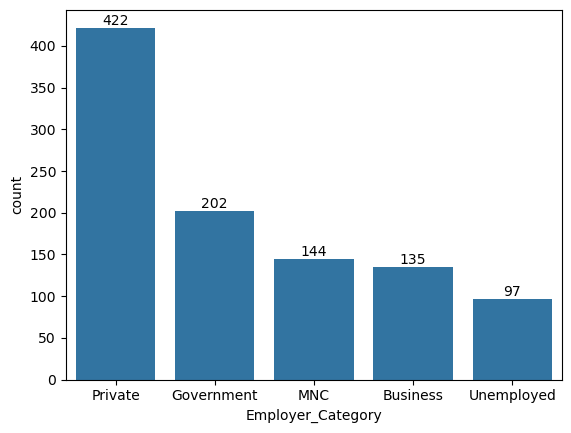

In [67]:
# analyze categories
Employer_Category_count = df["Employer_Category"].value_counts()
ax = sns.barplot(Employer_Category_count)
ax.bar_label(ax.containers[0], fontsize=10)

[Text(0, 0, '252'),
 Text(0, 0, '199'),
 Text(0, 0, '190'),
 Text(0, 0, '181'),
 Text(0, 0, '178')]

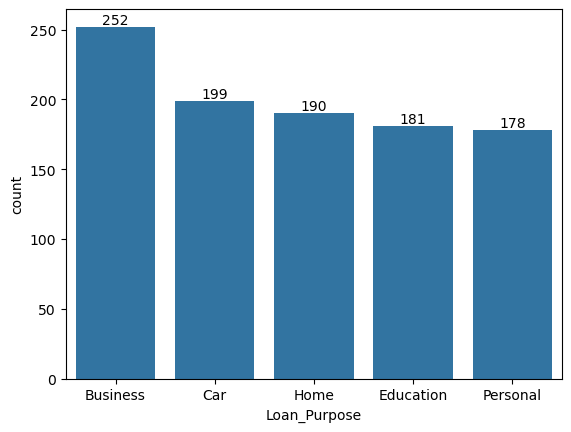

In [41]:
# analyze categories
loan_purpose_count = df["Loan_Purpose"].value_counts()
ax = sns.barplot(loan_purpose_count)
ax.bar_label(ax.containers[0])

[Text(0, 0, '206'), Text(0, 0, '496')]

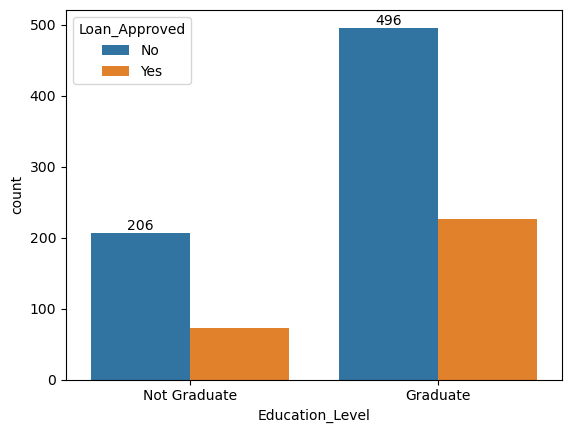

In [94]:
ax = sns.countplot(data=df, x="Education_Level",hue="Loan_Approved",stat="count")
ax.bar_label(ax.containers[0])

In [96]:
pd.crosstab(df["Education_Level"],df["Loan_Approved"],margins=True)

Loan_Approved,No,Yes,All
Education_Level,,,
Graduate,496,226,722
Not Graduate,206,72,278
All,702,298,1000


<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

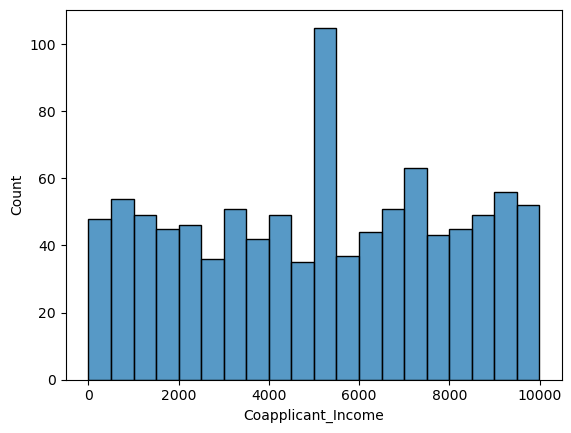

In [102]:
#analyze coincome
sns.histplot(data=df, x="Coapplicant_Income",bins=20)

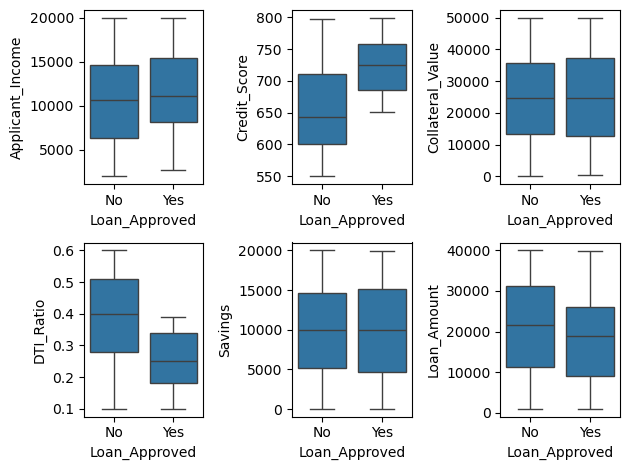

In [114]:
#check outliers

fig,axes = plt.subplots(2,3)
sns.boxplot(ax =axes[0,0], data=df, x="Loan_Approved", y="Applicant_Income")
sns.boxplot(ax =axes[0,1], data=df, x="Loan_Approved", y="Credit_Score")
sns.boxplot(ax =axes[1,0], data=df, x="Loan_Approved", y="DTI_Ratio")
sns.boxplot(ax =axes[1,1], data=df, x="Loan_Approved", y="Savings")
sns.boxplot(ax =axes[0,2], data=df, x="Loan_Approved", y="Collateral_Value")
sns.boxplot(ax =axes[1,2], data=df, x="Loan_Approved", y="Loan_Amount")

plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

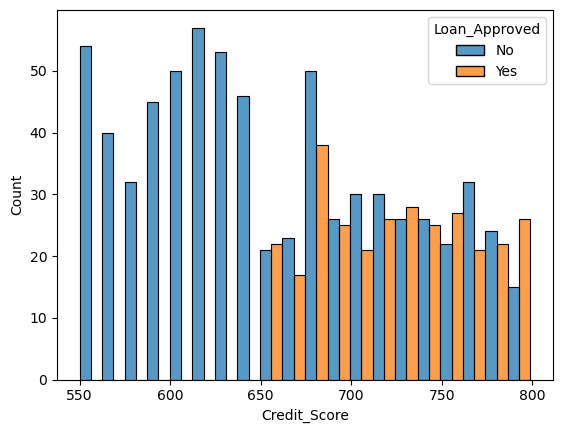

In [121]:
#Analyze credit score with loan approved 
sns.histplot(
    data = df,
    x="Credit_Score",
    hue="Loan_Approved",
    bins = 20,
    multiple="dodge"
)

<Axes: xlabel='DTI_Ratio', ylabel='Count'>

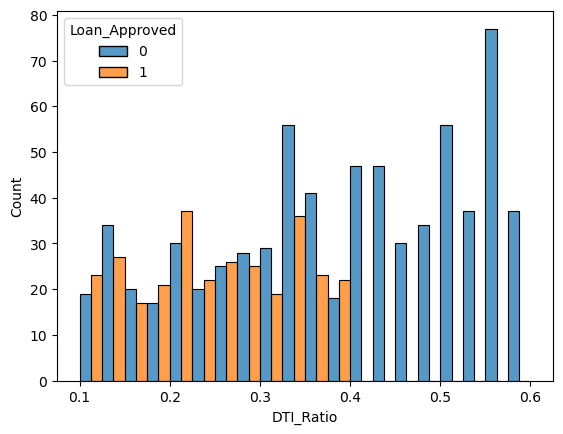

In [197]:
sns.histplot(
    data = df,
    x="DTI_Ratio",
    hue="Loan_Approved",
    bins = 20,
    multiple="dodge"
)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

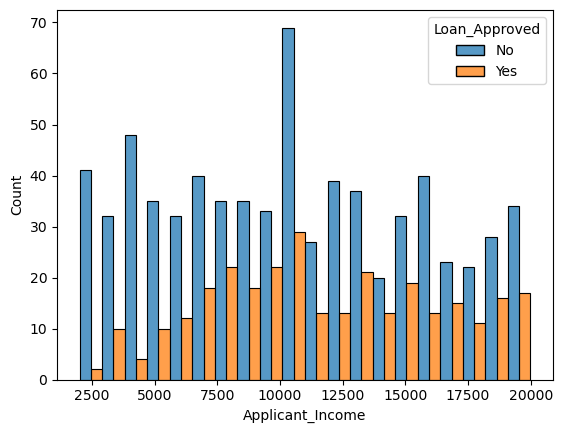

In [122]:
#Analyze Applicant_Income with loan approved 
sns.histplot(
    data = df,
    x="Applicant_Income",
    hue="Loan_Approved",
    bins = 20,
    multiple="dodge"
)

In [124]:
# Remove applicant ID 
df = df.drop("Applicant_ID", axis=1)

# Encoding

In [125]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [126]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
df["Education_Level"] = le.fit_transform(df["Education_Level"])
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])



In [136]:
cols = ["Employment_Status", "Marital_Status", "Loan_Purpose", "Property_Area", "Gender", "Employer_Category"]

ohe = OneHotEncoder(drop="first",sparse_output=False, handle_unknown='ignore')

encoded = ohe.fit_transform(df[cols])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cols), index=df.index)

df = pd.concat([df.drop(columns=cols), encoded_df], axis=1)


In [139]:
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Income                 1000 non-null   float64
 1   Coapplicant_Income               1000 non-null   float64
 2   Age                              1000 non-null   float64
 3   Dependents                       1000 non-null   float64
 4   Credit_Score                     1000 non-null   float64
 5   Existing_Loans                   1000 non-null   float64
 6   DTI_Ratio                        1000 non-null   float64
 7   Savings                          1000 non-null   float64
 8   Collateral_Value                 1000 non-null   float64
 9   Loan_Amount                      1000 non-null   float64
 10  Loan_Term                        1000 non-null   float64
 11  Education_Level                  1000 non-null   int64  
 12  Loan_Approved        

# Correlation Heatmap

<Axes: >

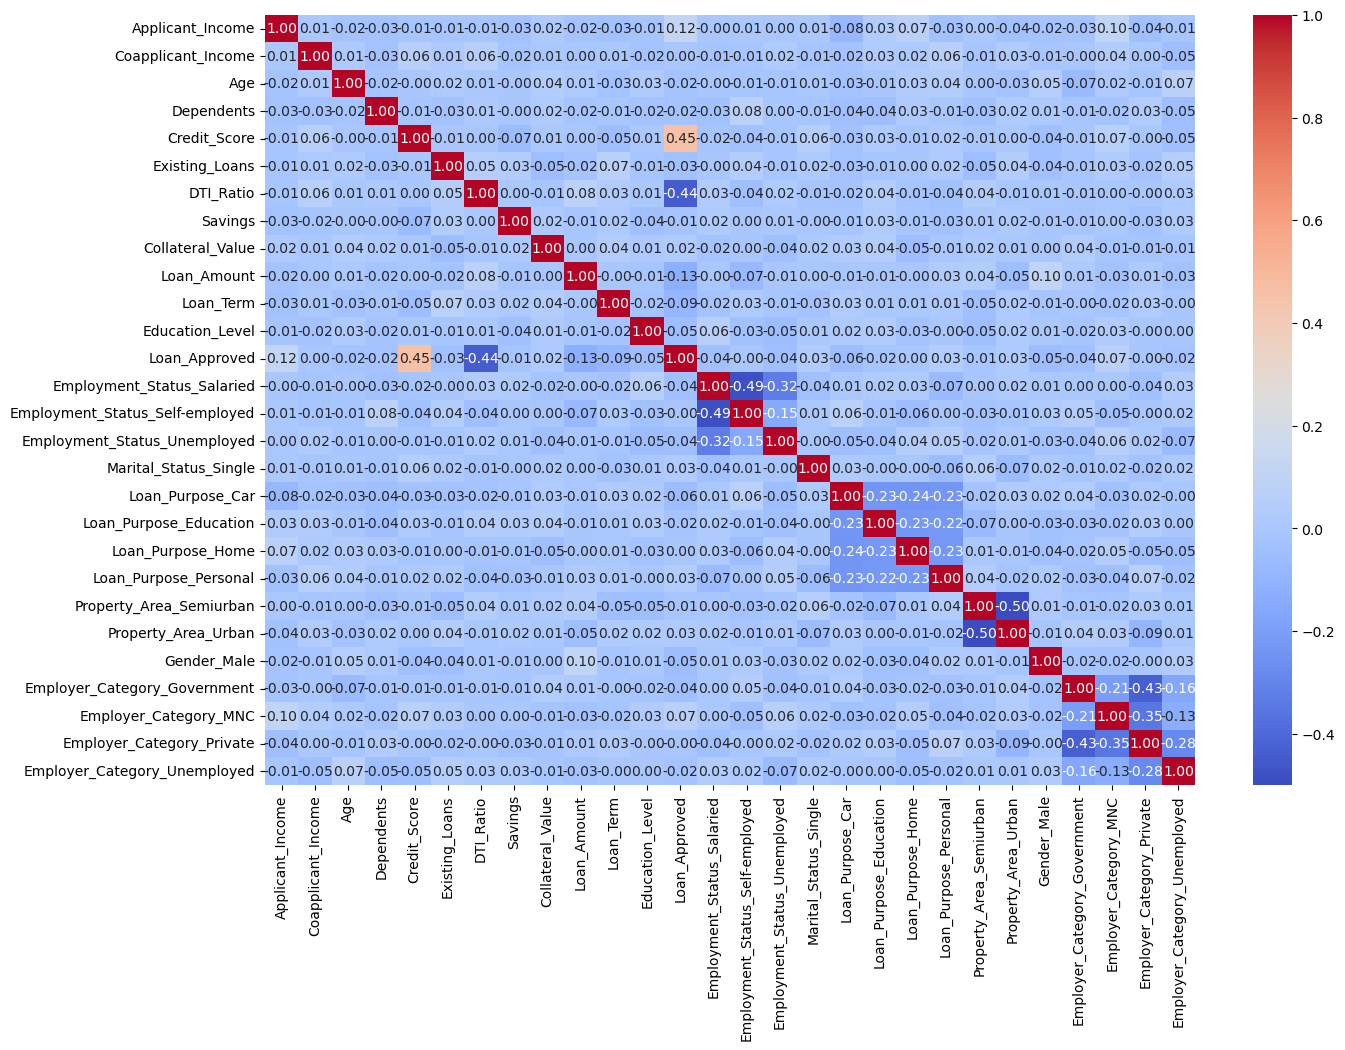

In [152]:
num_cols = df.select_dtypes(include="number")
corr_matrix = num_cols.corr()

plt.figure(figsize=(15,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

In [144]:
num_cols.corr()["Loan_Approved"].sort_values(ascending=False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed      -0.044464
Education_Level                 

# Train-Test-Split and Feature Scaling


In [153]:
X = df.drop("Loan_Approved", axis=1)
y = df["Loan_Approved"]

In [155]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Loan_Approved, dtype: int64

In [156]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [157]:
X_train.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Education_Level,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
29,5890.000000,8041.0,31.000000,0.0,603.000000,0.000000,0.11,11906.0,8150.000000,29287.000000,12.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
535,4779.000000,529.0,50.000000,0.0,614.000000,0.000000,0.21,5369.0,5430.000000,14786.000000,72.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
695,10852.571579,8927.0,36.000000,0.0,584.000000,4.000000,0.22,3186.0,24802.792632,20522.825263,48.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
557,2384.000000,2113.0,39.971579,1.0,726.000000,4.000000,0.34,11882.0,48542.000000,13312.000000,24.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
836,5228.000000,5249.0,42.000000,1.0,676.033684,1.950526,0.18,17669.0,24802.792632,13906.000000,84.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [158]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [160]:
X_test_scaled

array([[ 0.42610546,  0.55091079,  1.19037073, ..., -0.41388776,
         1.16316   , -0.30723158],
       [ 1.00971366,  0.58995935,  0.18392964, ..., -0.41388776,
         1.16316   , -0.30723158],
       [-0.67557096, -0.54558674,  1.09887608, ..., -0.41388776,
         1.16316   , -0.30723158],
       ...,
       [-0.67980585, -0.10106072,  1.28186537, ..., -0.41388776,
         1.16316   , -0.30723158],
       [-0.37650705, -0.97825874, -0.54802752, ..., -0.41388776,
        -0.85972695, -0.30723158],
       [-0.73647272, -1.24497436,  0.73289751, ..., -0.41388776,
         1.16316   , -0.30723158]], shape=(200, 27))

# Train & Evaluate Models

In [167]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

#Evaluation
print("Logistic Regression Model")
print("Precision score: " ,precision_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("confusion matrix: ", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Precision score:  0.7833333333333333
Recall score:  0.7704918032786885
F1 score:  0.7768595041322314
Accuracy score:  0.865
confusion matrix:  [[126  13]
 [ 14  47]]


In [173]:
#KNN 

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

#Evaluation
print("KNN Model")
print("Precision score: " ,precision_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("confusion matrix: ", confusion_matrix(y_test, y_pred))




KNN Model
Precision score:  0.6274509803921569
Recall score:  0.5245901639344263
F1 score:  0.5714285714285714
Accuracy score:  0.76
confusion matrix:  [[120  19]
 [ 29  32]]


In [174]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

#Evaluation
print("nb Model")
print("Precision score: " ,precision_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("confusion matrix: ", confusion_matrix(y_test, y_pred))


nb Model
Precision score:  0.8035714285714286
Recall score:  0.7377049180327869
F1 score:  0.7692307692307693
Accuracy score:  0.865
confusion matrix:  [[128  11]
 [ 16  45]]


# Feature Engineering

In [187]:
df["DTI_Ratio_sq"] = df["DTI_Ratio"] **2
df["Credit_Score _sq"] = df["Credit_Score"] **2

#df["Applicant_Income_sq"] = np.log1p(df["Applicant_Income"]) - to deal with outlier

X = df.drop(columns =["Loan_Approved", "Credit_Score", "DTI_Ratio"])
y = df["Loan_Approved"]



In [188]:
X.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Existing_Loans,Savings,Collateral_Value,Loan_Amount,Loan_Term,Education_Level,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,DTI_Ratio_sq,Credit_Score _sq,Applicant_Income_sq
0,17795.0,1387.0,51.0,0.0,4.0,19403.0,45638.0,16619.0,84.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.2809,405769.0,9.786729
1,2860.0,2679.0,46.0,3.0,2.0,2580.0,49272.0,38687.0,48.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0900,385641.0,7.958926
2,7390.0,2106.0,25.0,2.0,4.0,13844.0,6908.0,27943.0,72.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0400,454276.0,8.908018
3,13964.0,8173.0,40.0,2.0,3.0,9553.0,10844.0,27819.0,60.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0961,335241.0,9.544309
4,13284.0,4223.0,31.0,2.0,1.0,9386.0,37629.0,12741.0,72.0,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0841,519841.0,9.494391


In [189]:
#Test-Train-Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#Scaleing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [190]:
#Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

#Evaluation
print("Logistic Regression Model")
print("Precision score: " ,precision_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("confusion matrix: ", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Precision score:  0.7846153846153846
Recall score:  0.8360655737704918
F1 score:  0.8095238095238095
Accuracy score:  0.88
confusion matrix:  [[125  14]
 [ 10  51]]


In [191]:
#KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

#Evaluation
print("KNN Model")
print("Precision score: " ,precision_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("confusion matrix: ", confusion_matrix(y_test, y_pred))

KNN Model
Precision score:  0.6730769230769231
Recall score:  0.5737704918032787
F1 score:  0.6194690265486725
Accuracy score:  0.785
confusion matrix:  [[122  17]
 [ 26  35]]


In [192]:
#Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

#Evaluation
print("nb Model")
print("Precision score: " ,precision_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("confusion matrix: ", confusion_matrix(y_test, y_pred))

nb Model
Precision score:  0.8113207547169812
Recall score:  0.7049180327868853
F1 score:  0.7543859649122807
Accuracy score:  0.86
confusion matrix:  [[129  10]
 [ 18  43]]


In [195]:
df.shape

(1000, 31)